# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 675.6/675.6 kB 9.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for kdtree>=0.12 from https://files.pythonhosted.org/packages/00/3d/bd727d025b1706798aae14da3f69fc7d5a8639dc9e0eba37c7dcd43eb03e/kdtree-0.16-py2.py3-none-any.whl.metadata
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675969 sha256=34299a1d189b48180c5b1146d3b62d7032583a9a677be5c2b089388d142ba7ad
  Stored in directory: /Users/Mariel/Library/Caches/pip/wheels/4b/b5/88/49107ff846ec6967b34c17d369176c591fc90ed93b706755ad
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | sakakah
Processing Record 4 of Set 1 | gassol
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | rongelap
Processing Record 7 of Set 1 | bengkulu
Processing Record 8 of Set 1 | wenling
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | roma
Processing Record 17 of Set 1 | bandarbeyla
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | buka
Processing Record 21 of Set 1 | pont rouge
Processing Record 22 of Set 1 | wanning
Proc

Processing Record 41 of Set 4 | nogliki
Processing Record 42 of Set 4 | la huacana
Processing Record 43 of Set 4 | arno
Processing Record 44 of Set 4 | punta arenas
Processing Record 45 of Set 4 | jatani
Processing Record 46 of Set 4 | bikenibeu village
Processing Record 47 of Set 4 | vacaria
Processing Record 48 of Set 4 | santa luzia
Processing Record 49 of Set 4 | dallas
Processing Record 0 of Set 5 | petropavlovsk-kamchatsky
Processing Record 1 of Set 5 | antsiranana
Processing Record 2 of Set 5 | olonkinbyen
Processing Record 3 of Set 5 | villa gesell
Processing Record 4 of Set 5 | carutapera
Processing Record 5 of Set 5 | fuvahmulah
City not found. Skipping...
Processing Record 6 of Set 5 | cidreira
Processing Record 7 of Set 5 | iskateley
Processing Record 8 of Set 5 | kahramanmaras
Processing Record 9 of Set 5 | essaouira
Processing Record 10 of Set 5 | beau vallon
Processing Record 11 of Set 5 | kupang
Processing Record 12 of Set 5 | fort st. john
Processing Record 13 of Set 5

Processing Record 32 of Set 8 | ancud
Processing Record 33 of Set 8 | katsuura
Processing Record 34 of Set 8 | sinop
Processing Record 35 of Set 8 | tchibanga
Processing Record 36 of Set 8 | itacare
Processing Record 37 of Set 8 | la joya
Processing Record 38 of Set 8 | road town
Processing Record 39 of Set 8 | austintown
Processing Record 40 of Set 8 | kurmuk
Processing Record 41 of Set 8 | invercargill
Processing Record 42 of Set 8 | mahibadhoo
Processing Record 43 of Set 8 | harstad
Processing Record 44 of Set 8 | uzgen
Processing Record 45 of Set 8 | ayacucho
Processing Record 46 of Set 8 | ishigaki
Processing Record 47 of Set 8 | constitucion
Processing Record 48 of Set 8 | golfito
Processing Record 49 of Set 8 | vangaindrano
Processing Record 0 of Set 9 | bonny
Processing Record 1 of Set 9 | peace river
Processing Record 2 of Set 9 | itigi
Processing Record 3 of Set 9 | al jawf
Processing Record 4 of Set 9 | naze
Processing Record 5 of Set 9 | gaspe
Processing Record 6 of Set 9 |

Processing Record 22 of Set 12 | sisimiut
Processing Record 23 of Set 12 | la ronge
Processing Record 24 of Set 12 | posto fiscal rolim de moura
Processing Record 25 of Set 12 | tidjikja
Processing Record 26 of Set 12 | forster
Processing Record 27 of Set 12 | dunedin
Processing Record 28 of Set 12 | floro
Processing Record 29 of Set 12 | oliver
Processing Record 30 of Set 12 | am timan
Processing Record 31 of Set 12 | la asuncion
Processing Record 32 of Set 12 | amga
Processing Record 33 of Set 12 | new plymouth
Processing Record 34 of Set 12 | bargaal
Processing Record 35 of Set 12 | rabigh
Processing Record 36 of Set 12 | zimovniki
Processing Record 37 of Set 12 | san ignacio de velasco
Processing Record 38 of Set 12 | severnoye
Processing Record 39 of Set 12 | sabha
Processing Record 40 of Set 12 | mata-utu
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
print(city_weather)

{'coord': {'lon': -176.1745, 'lat': -13.2816}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 302.48, 'feels_like': 307.67, 'temp_min': 302.48, 'temp_max': 302.48, 'pressure': 1009, 'humidity': 75, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 4.98, 'deg': 70, 'gust': 5.43}, 'clouds': {'all': 81}, 'dt': 1710073661, 'sys': {'country': 'WF', 'sunrise': 1710179280, 'sunset': 1710223270}, 'timezone': 43200, 'id': 4034821, 'name': 'Mata-Utu', 'cod': 200}


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,300.20,76,5,8.08,MU,1710073619
1,west island,-12.1568,96.8225,301.14,94,100,12.86,CC,1710073619
2,sakakah,29.9697,40.2064,298.91,14,44,2.01,SA,1710073619
3,gassol,8.5333,10.4667,315.00,22,55,1.46,NG,1710073619
4,lompoc,34.6391,-120.4579,283.16,86,100,2.06,US,1710073619
...,...,...,...,...,...,...,...,...,...
560,zimovniki,47.1483,42.4633,278.49,56,95,4.87,RU,1710073661
561,san ignacio de velasco,-16.3667,-60.9500,300.00,73,96,2.75,BO,1710073661
562,severnoye,56.3491,78.3619,270.36,96,100,3.58,RU,1710073661
563,sabha,27.0377,14.4283,300.84,14,0,4.56,LY,1710073661


In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,300.20,76,5,8.08,MU,1710073619
1,west island,-12.1568,96.8225,301.14,94,100,12.86,CC,1710073619
2,sakakah,29.9697,40.2064,298.91,14,44,2.01,SA,1710073619
3,gassol,8.5333,10.4667,315.00,22,55,1.46,NG,1710073619
4,lompoc,34.6391,-120.4579,283.16,86,100,2.06,US,1710073619


In [8]:
import os

# Create the directory if it doesn't exist
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the City_Data into a csv
city_data_df.to_csv(f"{output_dir}/cities.csv", index_label="City_ID")


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,300.20,76,5,8.08,MU,1710073619
1,west island,-12.1568,96.8225,301.14,94,100,12.86,CC,1710073619
2,sakakah,29.9697,40.2064,298.91,14,44,2.01,SA,1710073619
3,gassol,8.5333,10.4667,315.00,22,55,1.46,NG,1710073619
4,lompoc,34.6391,-120.4579,283.16,86,100,2.06,US,1710073619


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

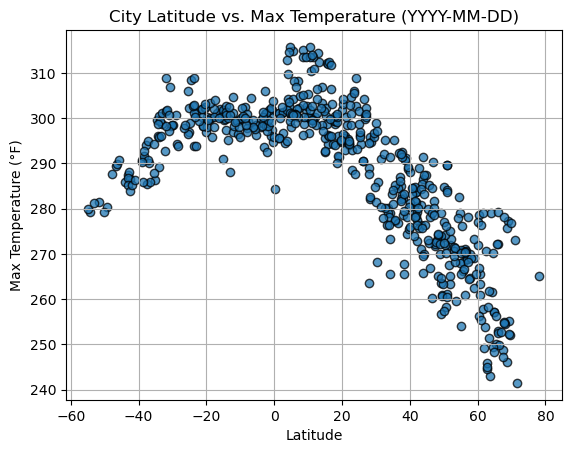

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (YYYY-MM-DD)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


In [12]:
plt.show()

#### Latitude Vs. Humidity

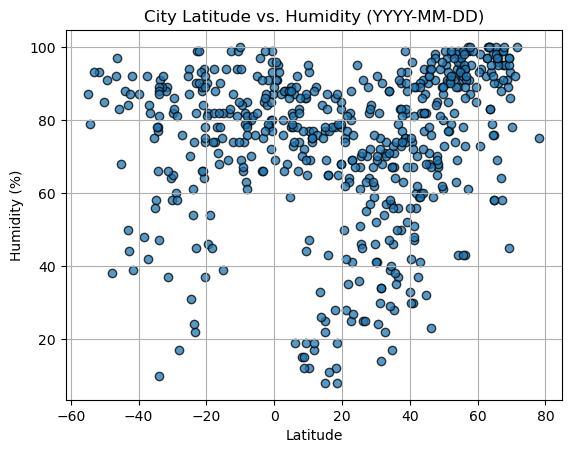

In [66]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (YYYY-MM-DD)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

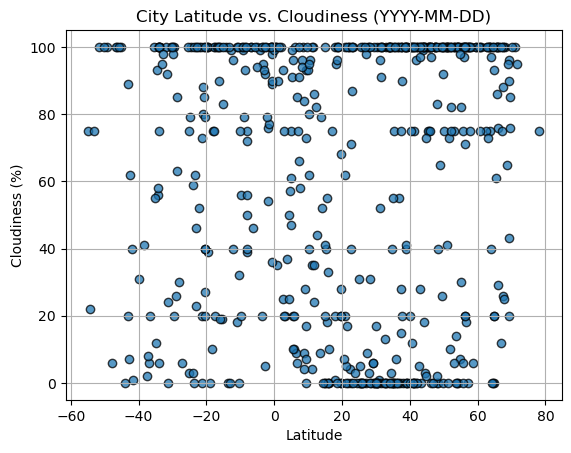

In [67]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (YYYY-MM-DD)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

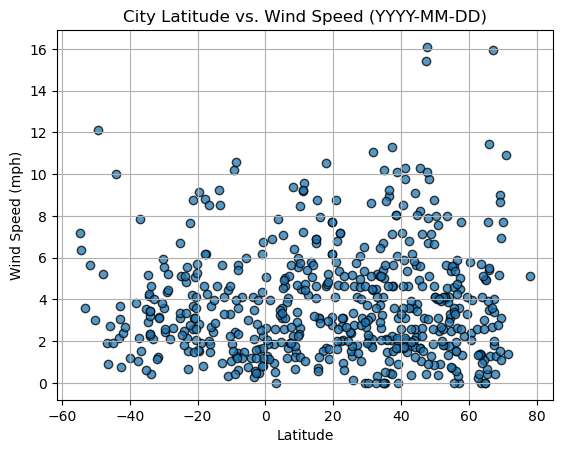

In [68]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (YYYY-MM-DD)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [79]:
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    """
    Create a linear regression plot.
    
    Parameters:
    - x_values: The values of the independent variable (e.g., latitude)
    - y_values: The values of the dependent variable (e.g., temperature)
    - xlabel: The label for the x-axis
    - ylabel: The label for the y-axis
    - title: The title of the plot
    - text_coordinates: The coordinates for placing the regression equation text on the plot
    """
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, color="red")
    
    # Annotate the regression equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")
    
    # Show plot
    plt.show()


In [80]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Filter the DataFrame to select rows where Latitude is greater than or equal to 0
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,oodweyne,9.4092,45.0640,293.06,44,0,3.42,SO,1707957583
2,qaqortoq,60.7167,-46.0333,272.56,98,100,2.37,GL,1707957583
5,daimiel,39.0700,-3.6150,285.39,93,100,1.69,ES,1707957583
7,petropavlovsk-kamchatsky,53.0452,158.6483,262.48,92,75,4.00,RU,1707957583
10,anadyr,64.7500,177.4833,247.43,76,0,5.00,RU,1707957584


In [81]:
# Filter the DataFrame to select rows where Latitude is less than 0
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,282.22,91,100,12.10,TF,1707957583
3,port lincoln,-34.7333,135.8667,291.56,58,12,5.18,AU,1707957379
4,daru,-9.0763,143.2092,304.06,66,99,2.46,PG,1707957583
6,adamstown,-25.0660,-130.1015,298.42,87,3,6.69,PN,1707957583
8,invercargill,-46.4000,168.3500,285.38,97,100,0.89,NZ,1707957583


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7231382713079323


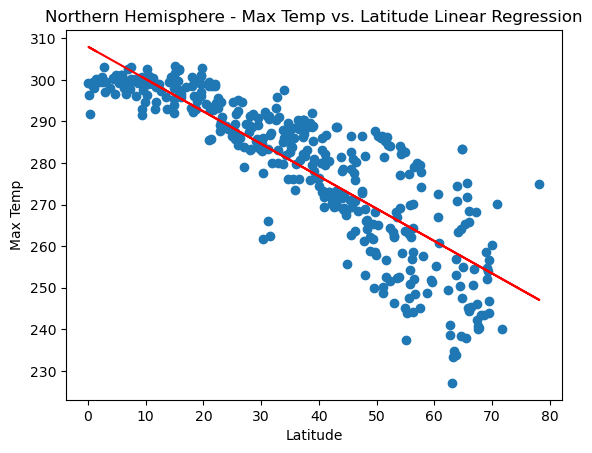

In [84]:
# Linear regression on Northern Hemisphere
# Extract data for linear regression on Northern Hemisphere
x_values_northern = northern_hemisphere_df["Lat"]
y_values_northern = northern_hemisphere_df["Max Temp"]

# Call the plot_linear_regression function
plot_linear_regression(x_values_northern, y_values_northern, "Latitude", "Max Temp", 
                       "Northern Hemisphere - Max Temp vs. Latitude Linear Regression", (0, 0))

The r-squared is: 0.4050638401108099


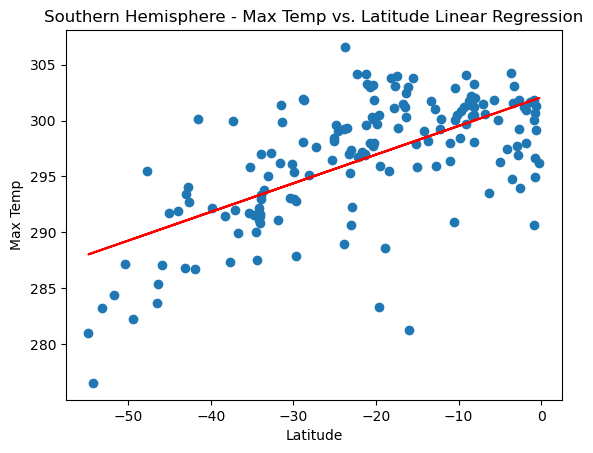

In [85]:
# Extract data for linear regression on Southern Hemisphere
x_values_southern = southern_hemisphere_df["Lat"]
y_values_southern = southern_hemisphere_df["Max Temp"]

# Call the plot_linear_regression function
plot_linear_regression(x_values_southern, y_values_southern, "Latitude", "Max Temp", 
                       "Southern Hemisphere - Max Temp vs. Latitude Linear Regression", (-50, 80))


**Discussion about the linear relationship:** This code shows us that it is true that the temperature increases as it gets closer to the equator. There is a negative correlation in the northern hemisphere as the latitude increases and a positive correlation in the southern hemisphere as the latiude decreases.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.12192327287966681


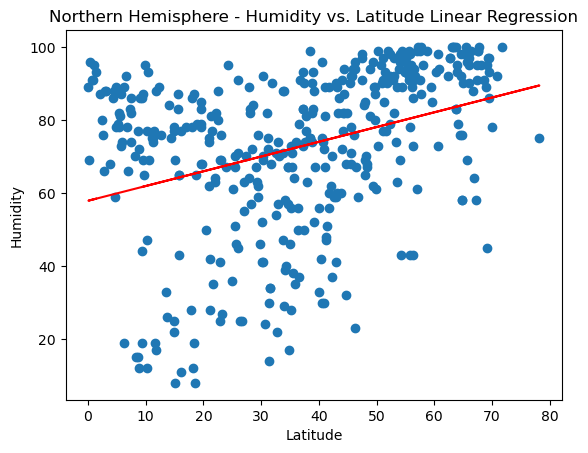

In [86]:
# Northern Hemisphere
# Extract data for linear regression on Northern Hemisphere
x_values_northern = northern_hemisphere_df["Lat"]
y_values_northern = northern_hemisphere_df["Humidity"]

# Call the plot_linear_regression function
plot_linear_regression(x_values_northern, y_values_northern, "Latitude", "Humidity", 
                       "Northern Hemisphere - Humidity vs. Latitude Linear Regression", (0, 0))


The r-squared is: 0.024697632934015716


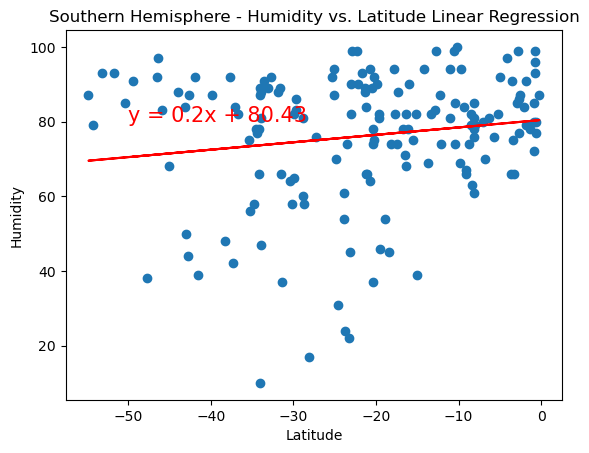

In [87]:
# Southern Hemisphere
# Extract data for linear regression on Southern Hemisphere
x_values_southern = southern_hemisphere_df["Lat"]
y_values_southern = southern_hemisphere_df["Humidity"]

# Call the plot_linear_regression function
plot_linear_regression(x_values_southern, y_values_southern, "Latitude", "Humidity", 
                       "Southern Hemisphere - Humidity vs. Latitude Linear Regression", (-50, 80))


**Discussion about the linear relationship:** There doesn't seem to be any correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.03047265740905329


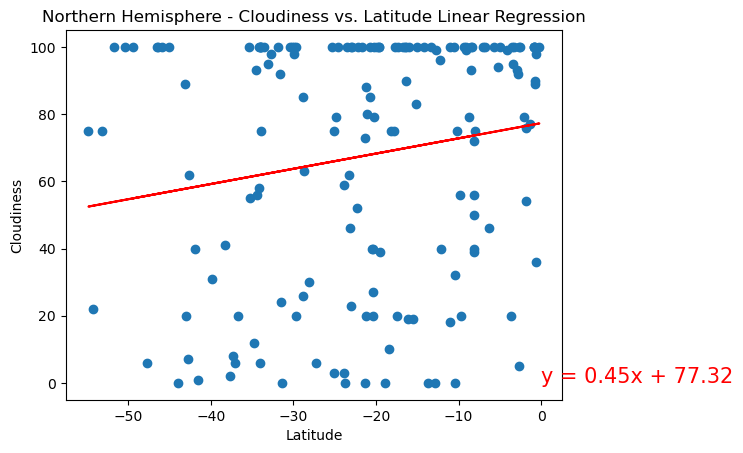

In [93]:
# Northern Hemisphere
# # Extract data for linear regression on Southern Hemisphere
x_values_northern = northern_hemisphere_df["Lat"]
y_values_northern = northern_hemisphere_df["Cloudiness"]

# Call the plot_linear_regression function
plot_linear_regression(x_values_southern, y_values_southern, "Latitude", "Cloudiness", 
                       "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression", (0, 0))


The r-squared is: 0.03047265740905329


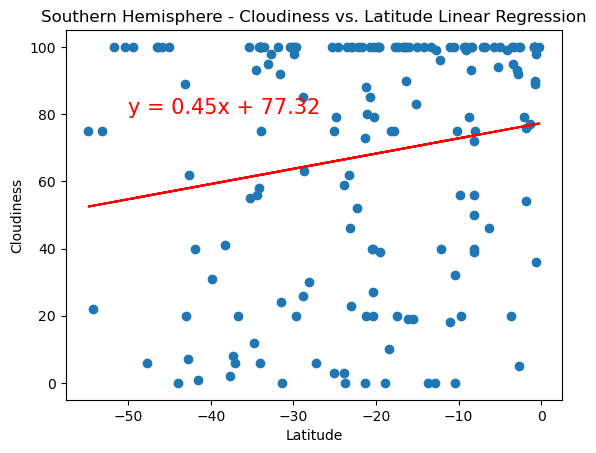

In [92]:
# Southern Hemisphere
# # Extract data for linear regression on Southern Hemisphere
x_values_southern = southern_hemisphere_df["Lat"]
y_values_southern = southern_hemisphere_df["Cloudiness"]

# Call the plot_linear_regression function
plot_linear_regression(x_values_southern, y_values_southern, "Latitude", "Cloudiness", 
                       "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression", (-50, 80))


**Discussion about the linear relationship:** Theres no correlation between cloudiness and latitude, both hemispheres have a positive correlation, meaning the closer you get to the equator doesn't make it anymore cloudier.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 8.661812993362376e-05


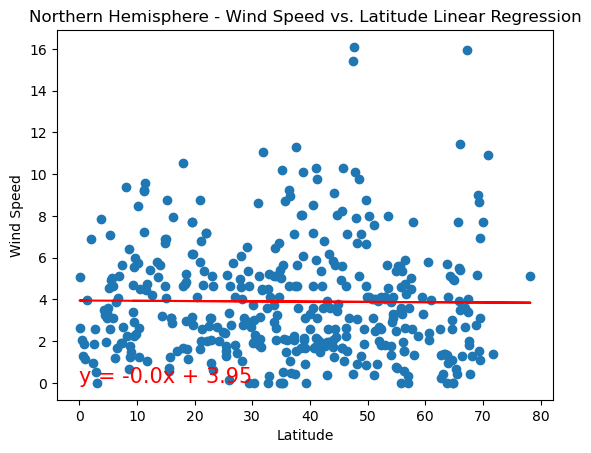

In [94]:
# Northern Hemisphere
# # Extract data for linear regression on Northern Hemisphere
x_values_northern = northern_hemisphere_df["Lat"]
y_values_northern = northern_hemisphere_df["Wind Speed"]

# Call the plot_linear_regression function
plot_linear_regression(x_values_northern, y_values_northern, "Latitude", "Wind Speed", 
                       "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression", (0, 0))


The r-squared is: 0.02354475513100988


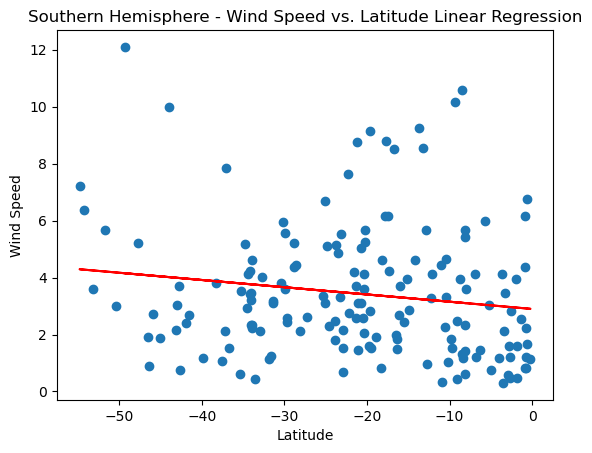

In [95]:
# Southern Hemisphere
#  Extract data for linear regression on Southern Hemisphere
x_values_southern = southern_hemisphere_df["Lat"]
y_values_southern = southern_hemisphere_df["Wind Speed"]

# Call the plot_linear_regression function
plot_linear_regression(x_values_southern, y_values_southern, "Latitude", "Wind Speed", 
                       "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression", (-50, 80))


**Discussion about the linear relationship:** There is a very little relationship between wind speed and latitude. The scatter plots are too scattered to really be able to determine anything.